<a href="https://colab.research.google.com/github/IndraP24/Course-LabWorks/blob/main/Computer%20Vision/CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying thresholding function, power law transformation and logorithmic transformation on a given set of Test Images

## Importing dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Datasets/Test_Images/I1.png")

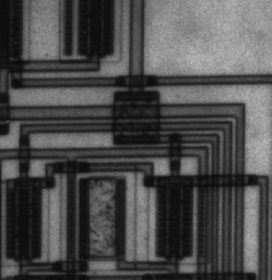

In [ ]:
cv2_imshow(img)

# Threshold Function

In [ ]:
def thresholdFunc(img):
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
    ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

    print('Binary Threshold')
    cv2_imshow(thresh1)
    print('Binary Threshold Inverted')
    cv2_imshow(thresh2)
    print('Truncated Threshold')
    cv2_imshow(thresh3) 
    print('Set to 0')
    cv2_imshow(thresh4)
    print('Set to 0 Inverted')
    cv2_imshow(thresh5)
        
    # De-allocate any associated memory usage   
    if cv2.waitKey(0) & 0xff == 27: 
        cv2.destroyAllWindows()

# Power-Law (Gamma) Transformation

In [ ]:
def powerLaw(img):
    # Trying 4 gamma values. 
    for gamma in [0.1, 0.5, 1, 1.5, 2]: 
        
        # Apply gamma correction. 
        gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
    
        # Show edited images.
        print("Gamma Transformed:", gamma)
        cv2_imshow(gamma_corrected)
        print("--------------------------------------")

# Log Transformation

In [ ]:
def logTransform(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * (np.log(img + 1))
    log_img = np.array(log_img, dtype=np.uint8)
    print("Log Transformed Image")
    cv2_imshow(log_img)

# Automated Image reading and Transformation

In [ ]:
path_b = "/content/drive/MyDrive/Colab Notebooks/Datasets/Test_Images/I"
for i in range(1,17):
    path = path_b + str(i)
    if i==1 or i==10:
        path = path + ".png"
    elif i==11:
        path = path + ".tif"
    else:
        path = path + ".jpg"
    img = cv2.imread(path)
    print("Original Image:")
    cv2_imshow(img)
    thresholdFunc(img)
    powerLaw(img)
    logTransform(img)
    print("\n\n==============================================")